In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1=pd.read_csv("/content/water_potability.csv")
df1

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [ ]:
df=df1.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe(include="all")

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
# The dataset contains missing values in ph, Sulfate, and Trihalomethanes

ph
Axes(0.125,0.11;0.775x0.77)


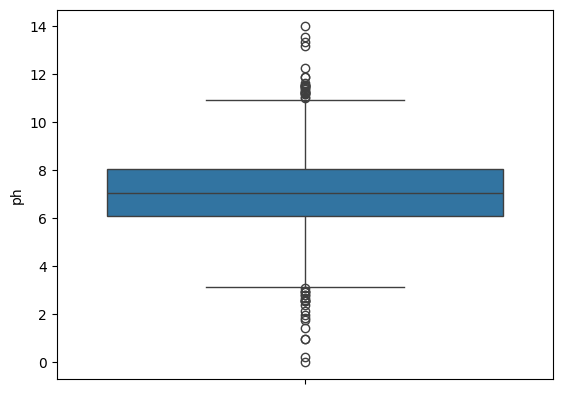

Hardness
Axes(0.125,0.11;0.775x0.77)


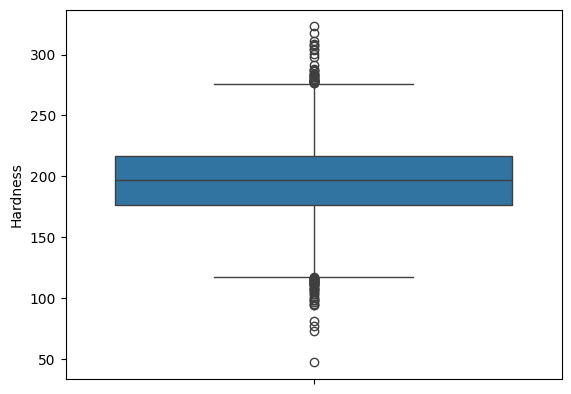

Solids
Axes(0.125,0.11;0.775x0.77)


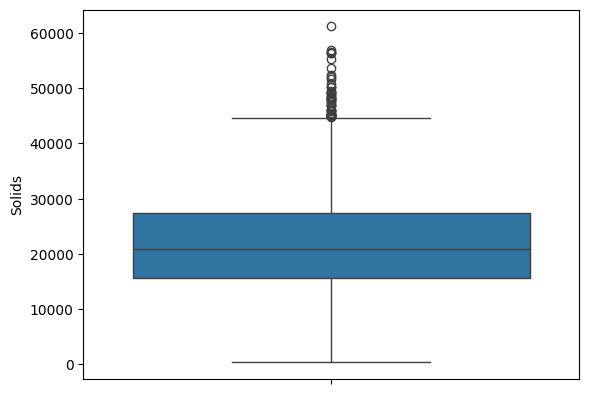

Chloramines
Axes(0.125,0.11;0.775x0.77)


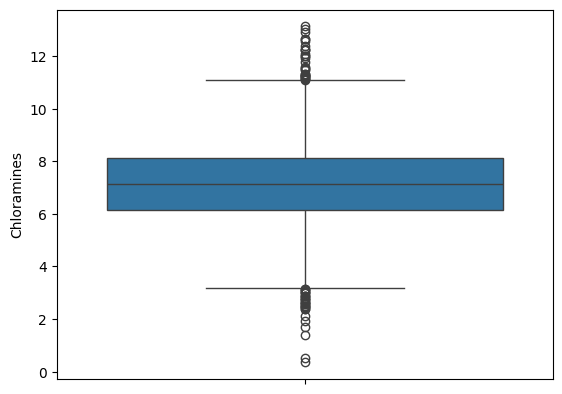

Sulfate
Axes(0.125,0.11;0.775x0.77)


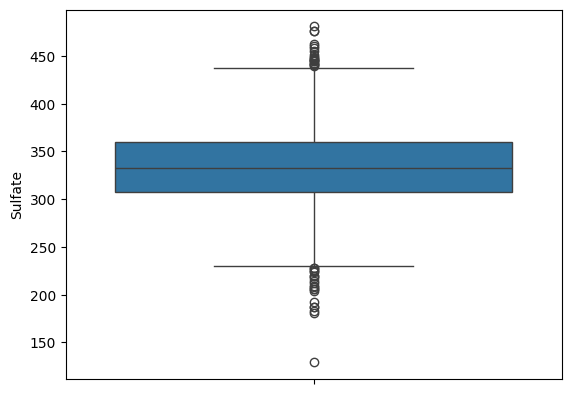

Conductivity
Axes(0.125,0.11;0.775x0.77)


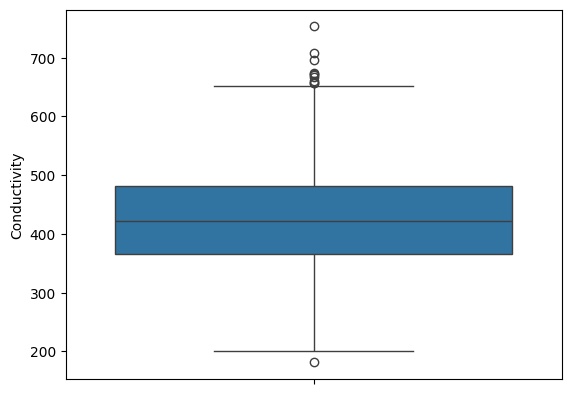

Organic_carbon
Axes(0.125,0.11;0.775x0.77)


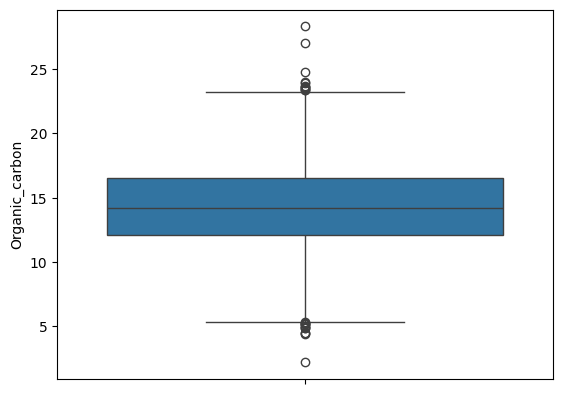

Trihalomethanes
Axes(0.125,0.11;0.775x0.77)


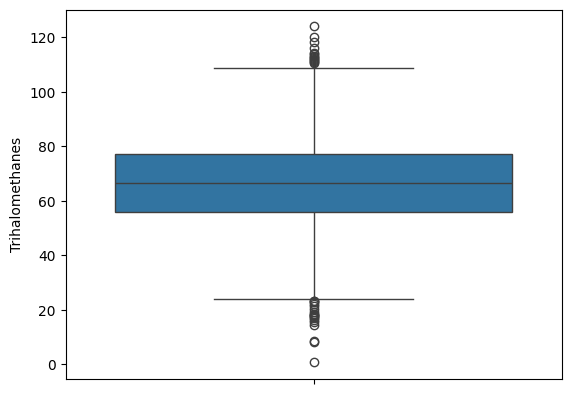

Turbidity
Axes(0.125,0.11;0.775x0.77)


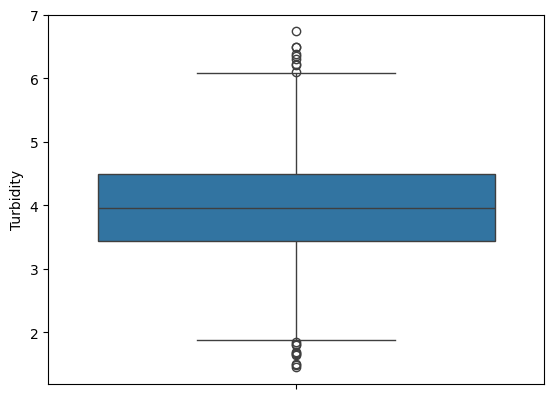

In [ ]:
for i in df.columns:
  if df[i].dtype==np.float64:
    print(i)
    print(sns.boxplot(df[i]))   # To plot the boxplots for every numerical column to find the presence of outliers.
    plt.show()


In [ ]:
# Boxplots were used to identify outliers in numeric features

# **Handling Outliers**

ph


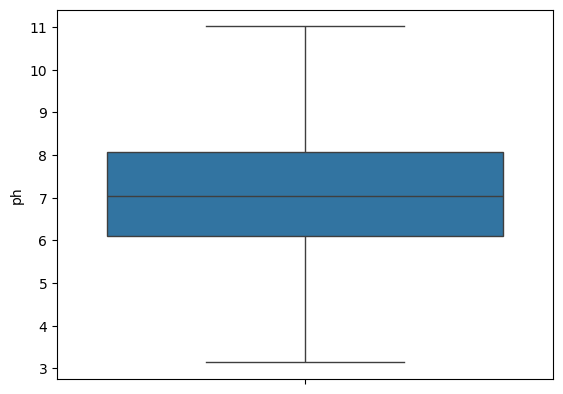

Hardness


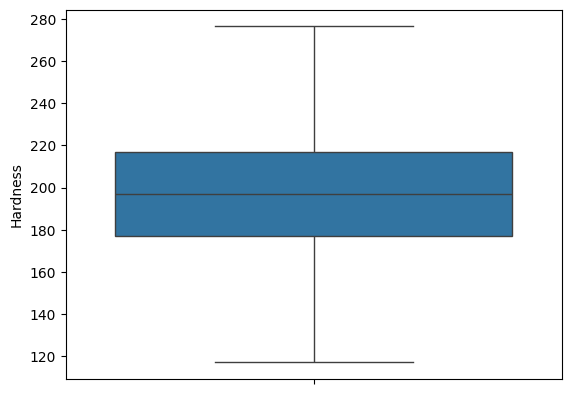

Solids


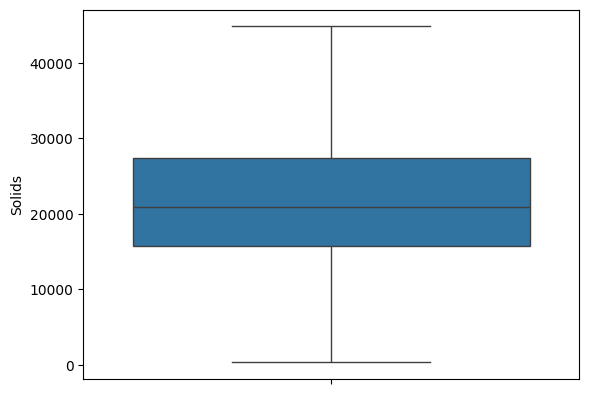

Chloramines


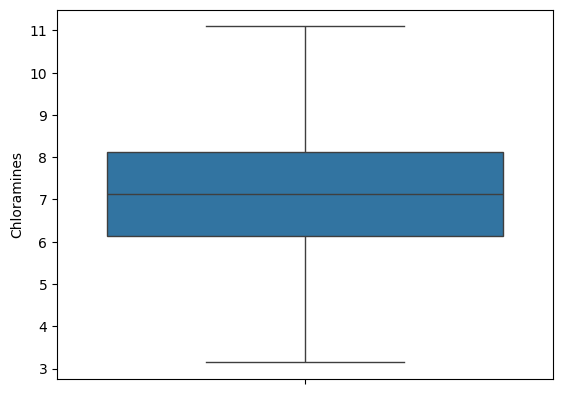

Sulfate


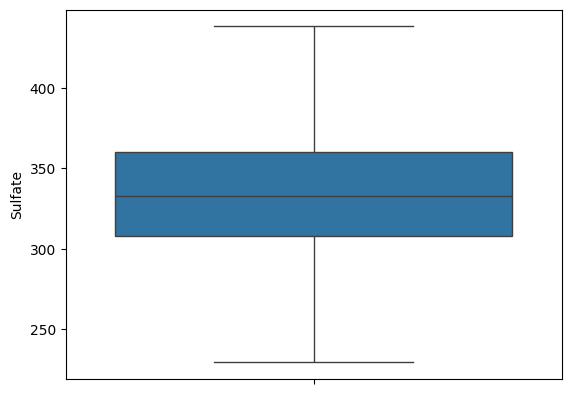

Conductivity


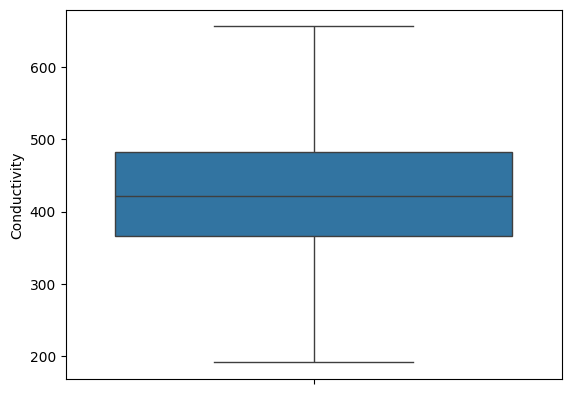

Organic_carbon


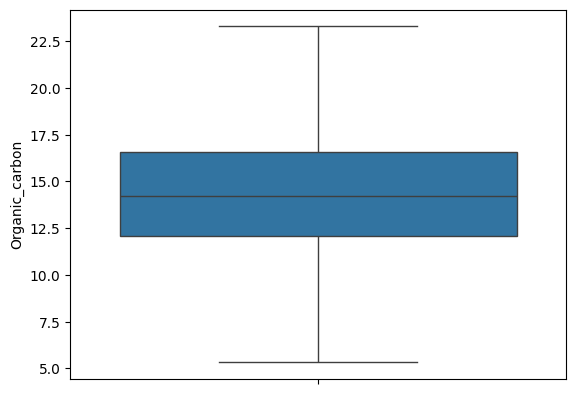

Trihalomethanes


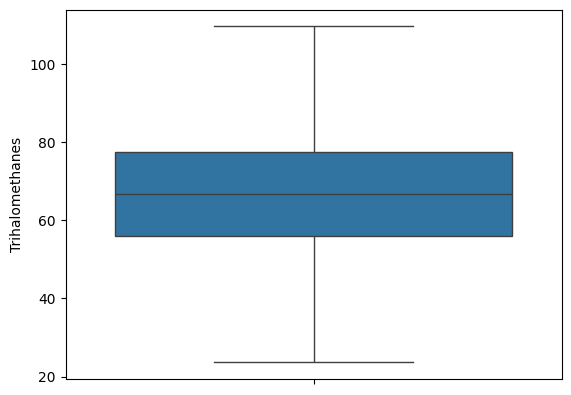

Turbidity


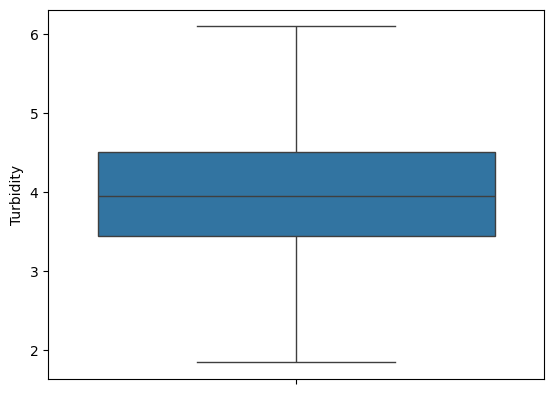

In [ ]:
for i in df.columns:
  if df[i].dtype==np.float64:
    print(i)
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    max_value=q3+1.5*iqr
    min_value=q1-1.5*iqr
    df[i]=np.where(df[i]>max_value,max_value,df[i])
    df[i]=np.where(df[i]<min_value,min_value,df[i])
    sns.boxplot(df[i])
    plt.show()


In [ ]:
# Outliers were handled using IQR (Interquartile Range) capping to limit extreme values.

# **Handling Null Values**

In [ ]:
df["ph"].fillna(df["ph"].median(),inplace=True)
df["Sulfate"].fillna(df["Sulfate"].median(),inplace=True)
df["Trihalomethanes"].fillna(df["Trihalomethanes"].median(),inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
# ph, Sulfate, and Trihalomethanes were filled using median imputation

# **Data Visualization**

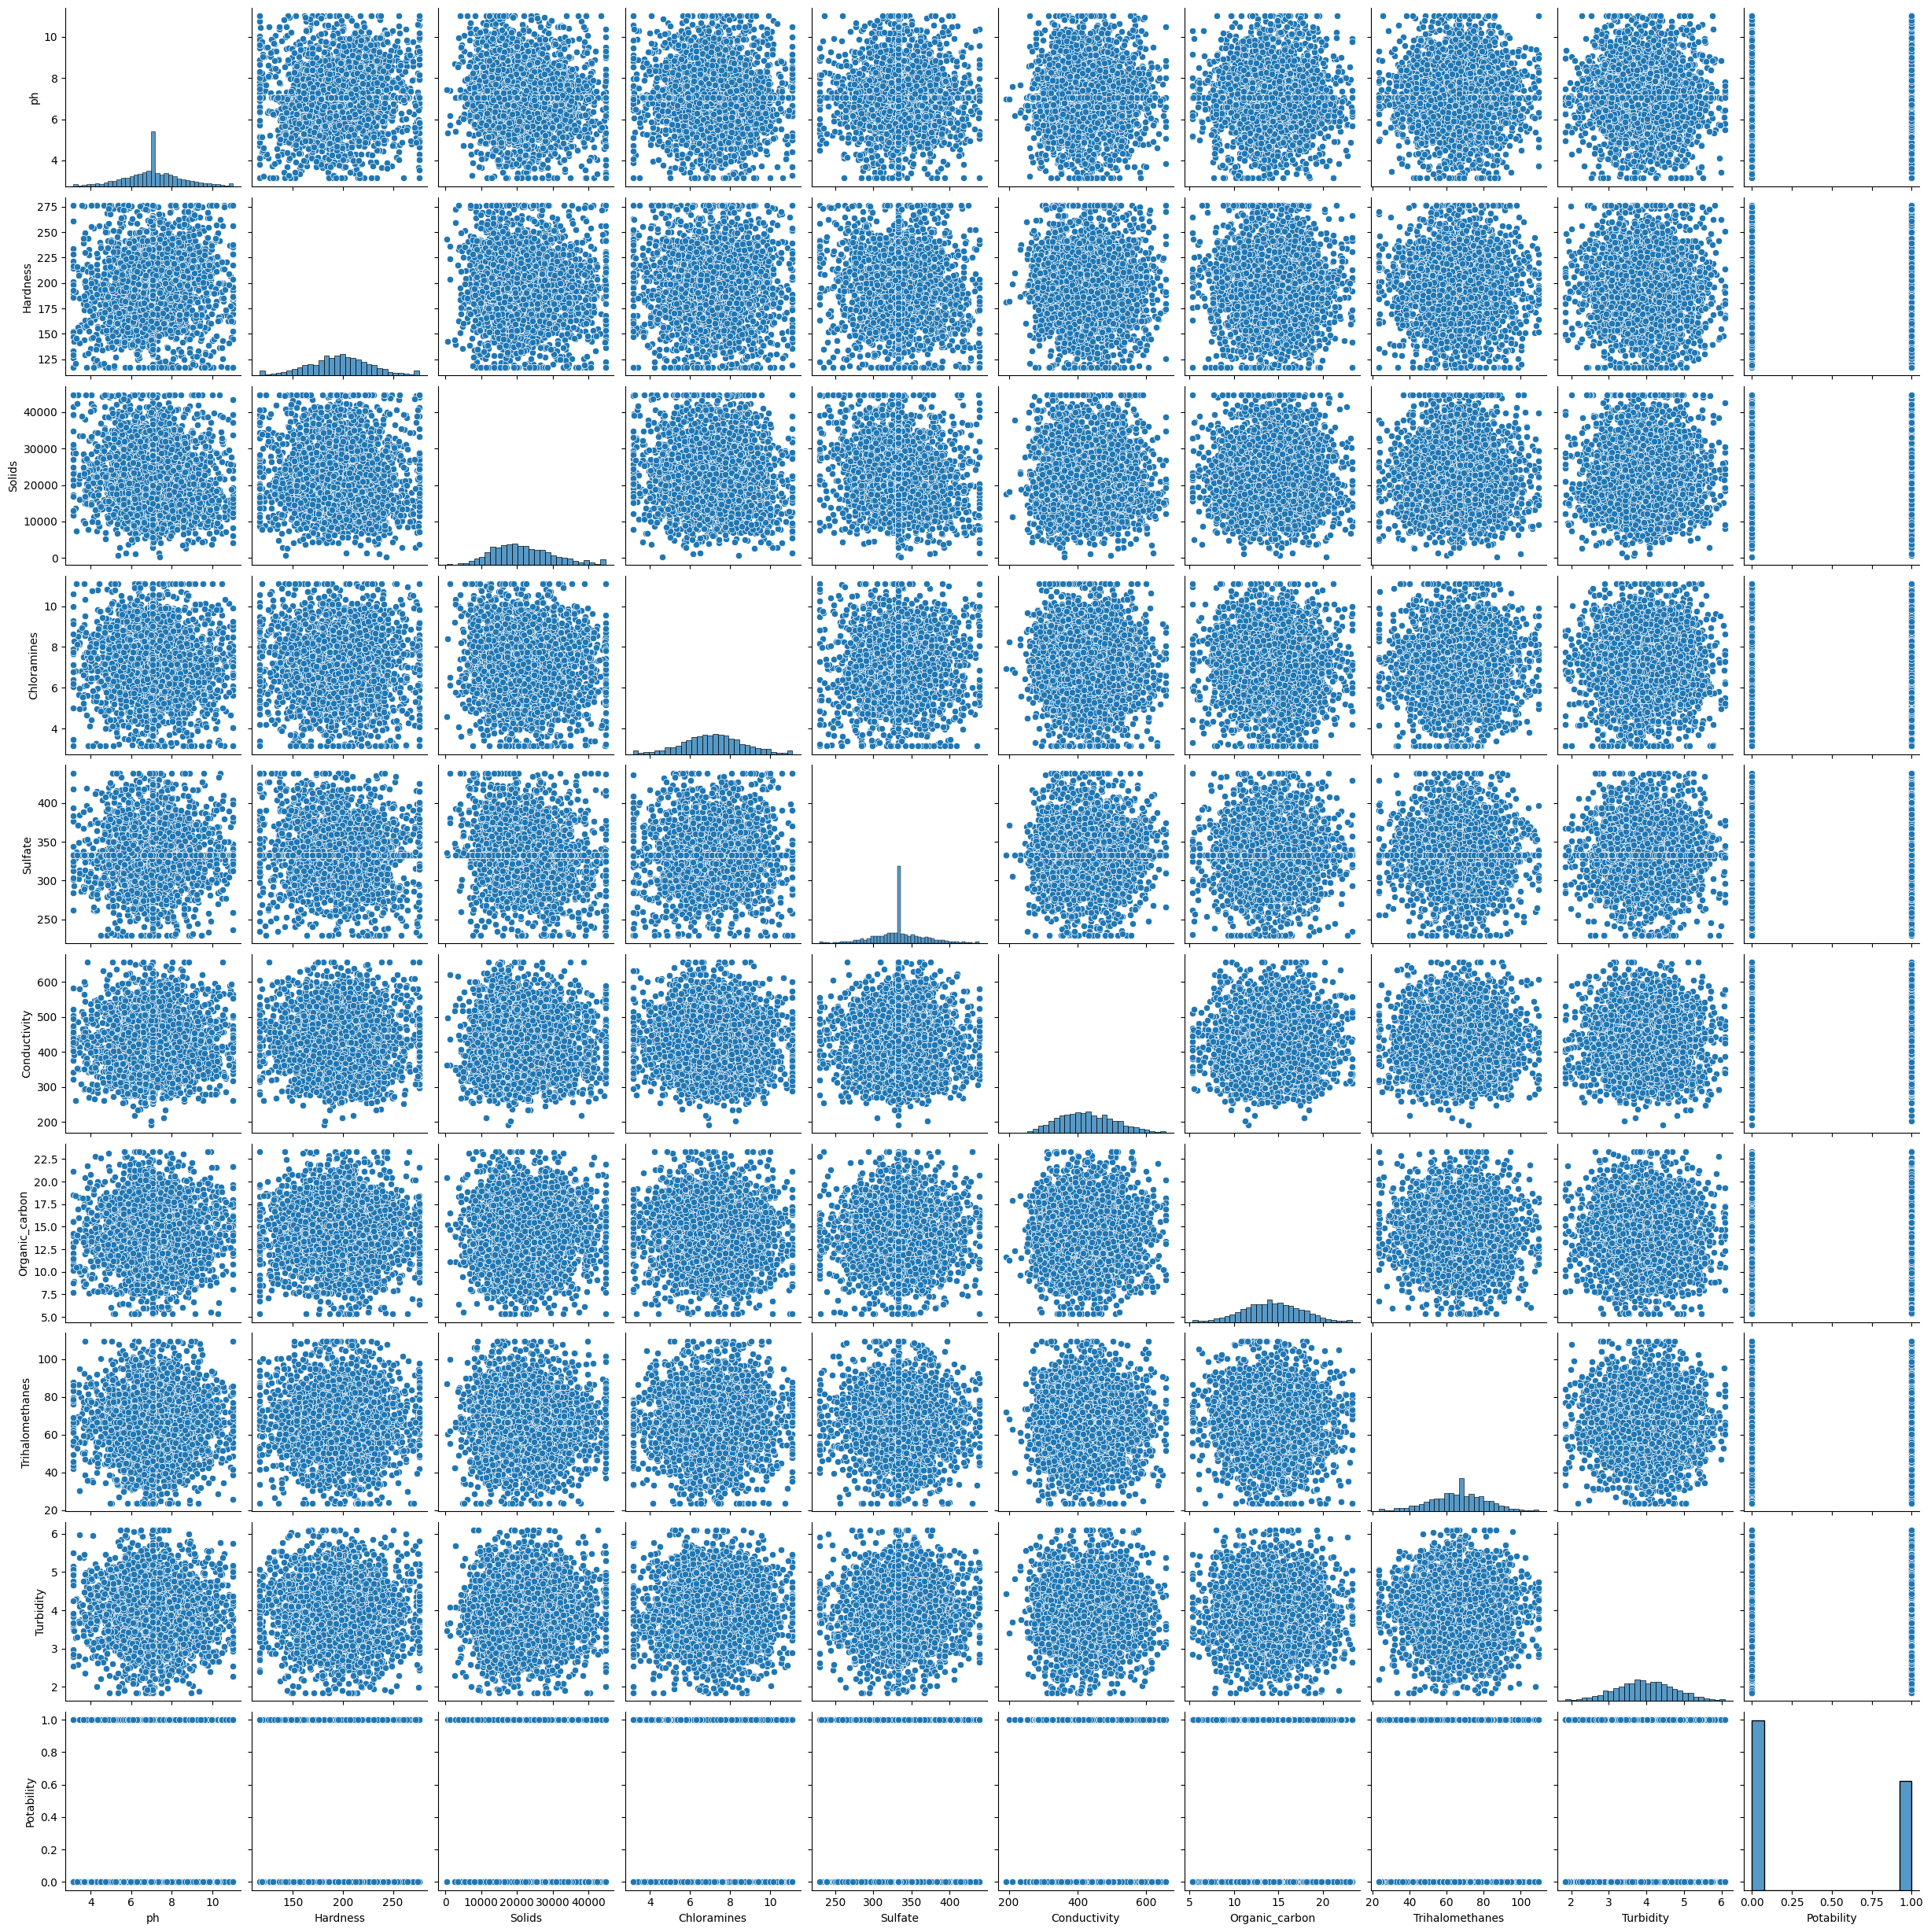

In [ ]:
sns.pairplot(df)

In [ ]:
# No strong visible relationships between features

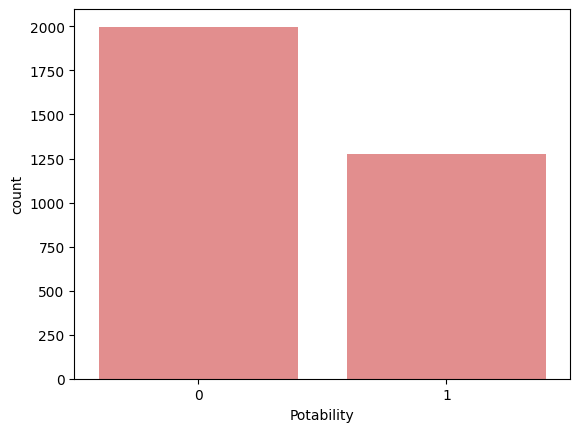

In [ ]:
sns.countplot(x="Potability",data=df,color="lightcoral")
plt.show()

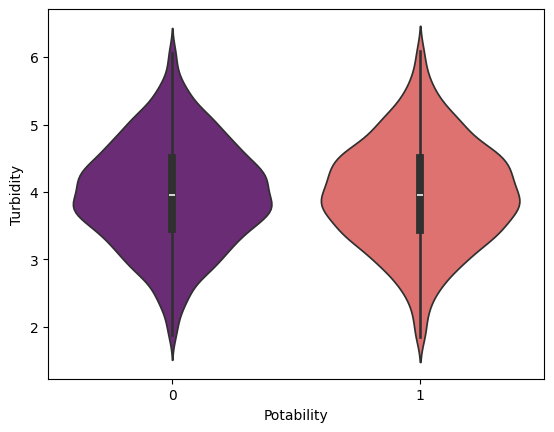

In [ ]:
sns.violinplot(x="Potability",y="Turbidity",data=df,palette="magma")
plt.show()

In [ ]:
# Turbidity does not show a strong distinction between potable and non-potable water.

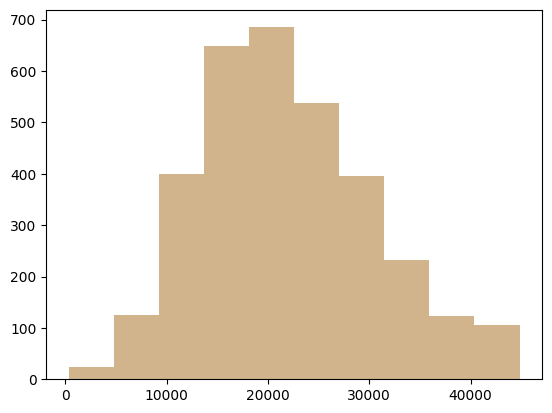

In [ ]:
plt.hist(df["Solids"],color="tan")
plt.show()

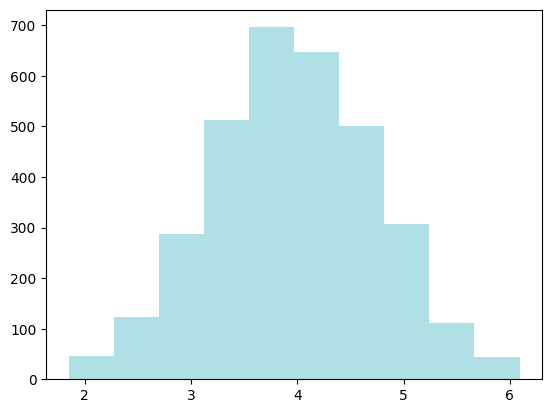

In [ ]:
plt.hist(df["Turbidity"],color="powderblue")
plt.show()

In [ ]:
# Turbidity, Solids have right-skewed distributions

<Axes: >

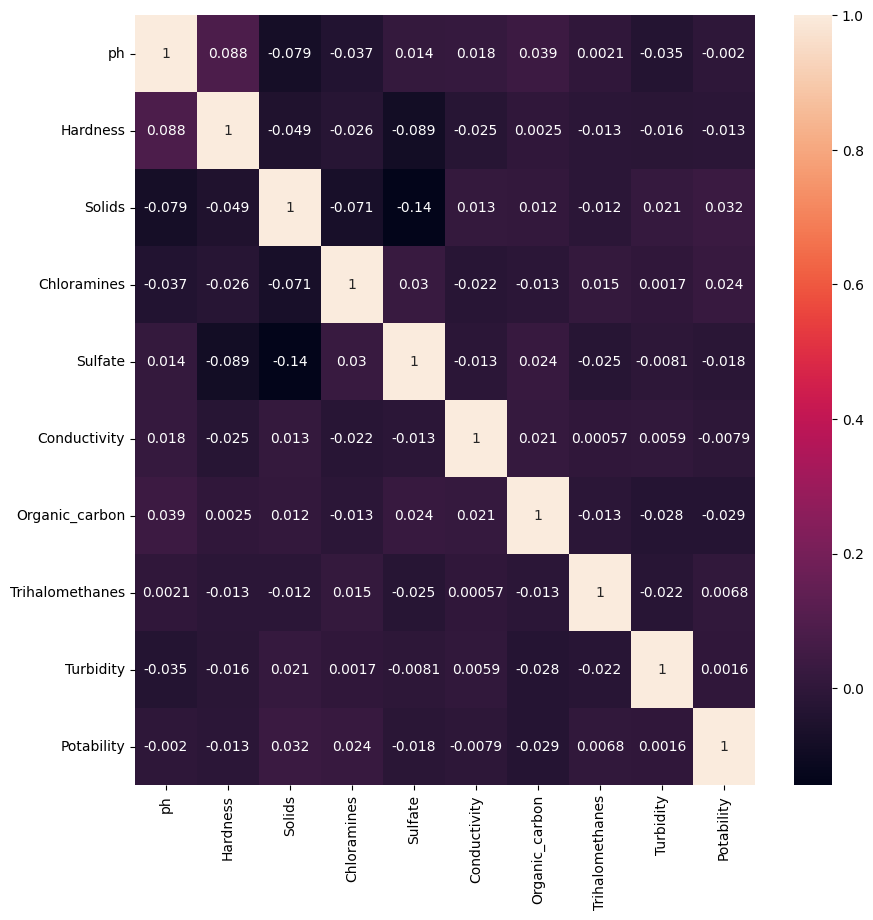

In [ ]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# Potability has weak correlations with individual features

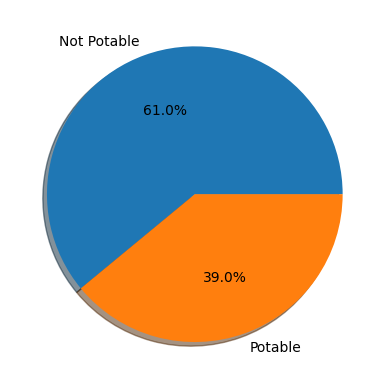

In [ ]:
%matplotlib inline
plt.pie(df["Potability"].value_counts(),labels=["Not Potable","Potable"],autopct="%1.1f%%",shadow=True)
plt.show()

In [ ]:
# The proportion of Not Potable water is higher than Potable water

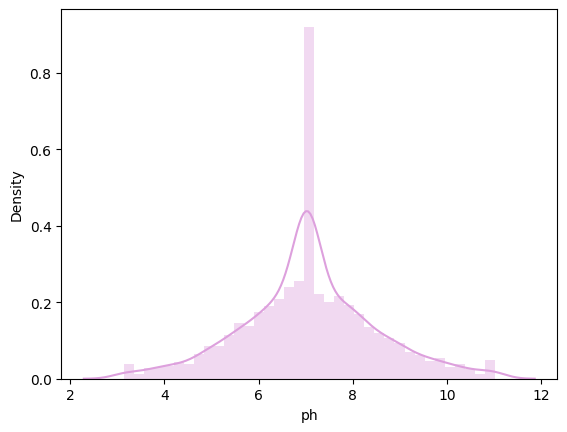

In [ ]:
sns.distplot(df["ph"],color="plum")
plt.show()

In [ ]:
# ph is normally distributed but has some extreme values.

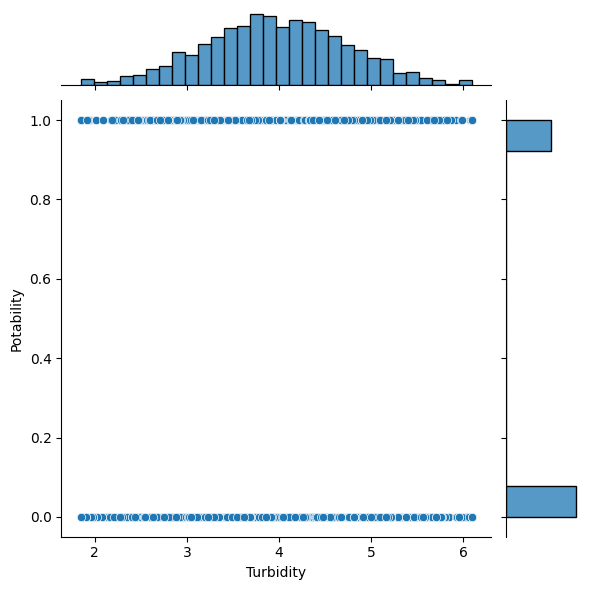

In [ ]:
sns.jointplot(x="Turbidity",y="Potability",data=df,palette="coolwarm")
plt.show()

In [ ]:
# Turbidity does not show a strong correlation with water potability.

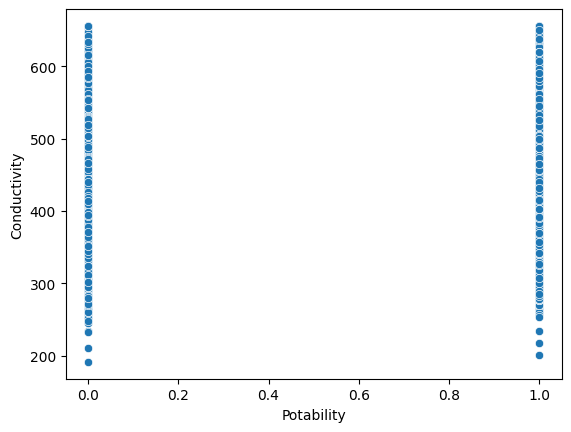

In [ ]:
sns.scatterplot(x="Potability",y="Conductivity",data=df,palette="magma")
plt.show()

In [ ]:
# Conductivity does not show a strong separation between potable and non-potable water.

# **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in df.columns:
  if df[i].dtype==np.float64:
    df[i]=sc.fit_transform(df[[i]])

In [ ]:
x=df.drop(["Potability"],axis=1)
y=df[["Potability"]]

In [ ]:
# The target variable is Potability (0 = Not Potable, 1 = Potable).

# **Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
accuracy_score(y_test,y_pred)

0.6265243902439024

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data with controlled randomness
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

# Creating the Logistic Regression model with hyperparameters
logreg = LogisticRegression(
    solver='liblinear',    # Good for small datasets and binary classification
    C=1.0,                 # Inverse of regularization strength (smaller = stronger regularization)
    penalty='l2',          # Regularization type
    max_iter=200,          # Max number of iterations
    random_state=10        # Controls randomness in certain solvers (liblinear, saga)
)

# Training the model
logreg.fit(x_train, y_train)

# Making predictions
y_pred = logreg.predict(x_test)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.63


In [ ]:
# The accuracy is 62.8. So let's try using another model to get more accuracy

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6189024390243902

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=20)

# Creating the Decision Tree Classifier with hyperparameters
clf = DecisionTreeClassifier(
    criterion='entropy',     # Split quality measure ('gini' or 'entropy')
    max_depth=5,             # Maximum depth of the tree
    min_samples_split=4,     # Minimum samples required to split an internal node
    min_samples_leaf=2,      # Minimum samples required to be at a leaf node
    random_state=20          # Controls randomness
)

# Training the model
clf.fit(x_train, y_train)

# Making predictions
y_pred = clf.predict(x_test)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.63


In [ ]:
# The accuracy is similar to Logistic Regression.

# **RandomForest Algorithm**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)
rfc=RandomForestClassifier(random_state=10)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.7012195121951219

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

# Creating Random Forest Classifier with hyperparameters
rfc = RandomForestClassifier(
    n_estimators=150,         # Number of trees
    criterion='entropy',      # Quality measure
    max_depth=8,              # Maximum depth of tree
    min_samples_split=4,      # Minimum samples to split a node
    min_samples_leaf=2,       # Minimum samples at a leaf node
    max_features='sqrt',      # Number of features considered at each split
    random_state=10
)

# Training the model
rfc.fit(x_train, y_train)

# Making predictions
y_pred = rfc.predict(x_test)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.68


In [ ]:
# The accuracy is higher when compared to Logistic Regression and Decision Tree

# **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)
svc=SVC(C=100.0)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.6509146341463414

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

# Creating SVC model with hyperparameters
svc = SVC(
    C=100.0,                # Regularization parameter
    kernel='rbf',           # Radial basis function kernel
    gamma='scale',          # Kernel coefficient
    probability=True,       # Enable probability estimates
    shrinking=True,         # Whether to use shrinking heuristic
)

# Training the model
svc.fit(x_train, y_train)

# Making predictions
y_pred = svc.predict(x_test)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.65


In [ ]:
# Moderate accuracy (65%), meaning the model is performing better than random guessing.

# **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion_matrix \n\n",cm)
print("\n True Positives (TP)=", cm[0,0])
print("\n True Negatives (TN)=", cm[1,1])
print("\n False Positives (FP)=", cm[0,1])
print("\n False Negatives (FN)=", cm[1,1])

Confusion_matrix 

 [[314  97]
 [132 113]]

 True Positives (TP)= 314

 True Negatives (TN)= 113

 False Positives (FP)= 97

 False Negatives (FN)= 113


<Axes: >

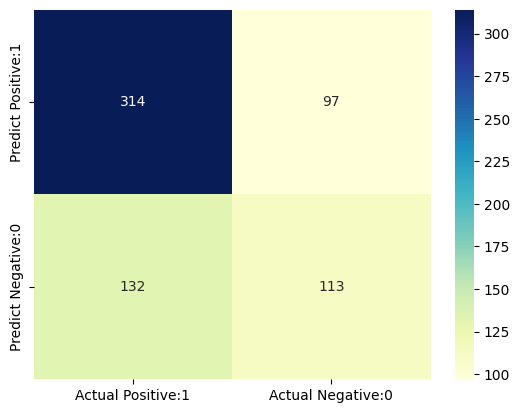

In [ ]:
cm_matrix=pd.DataFrame(data=cm,columns=["Actual Positive:1","Actual Negative:0"],index=["Predict Positive:1","Predict Negative:0"])
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="YlGnBu")

In [ ]:
# The model performs better at detecting positive cases (Potable water) than negative cases

# **Evaluation Metrics**

In [ ]:
TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Accuracy: 0.6509
Precision: 0.5381
Recall: 0.4612
F1-Score: 0.4967


# **Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       411
           1       0.54      0.46      0.50       245

    accuracy                           0.65       656
   macro avg       0.62      0.61      0.61       656
weighted avg       0.64      0.65      0.64       656



# **ROC Curve**

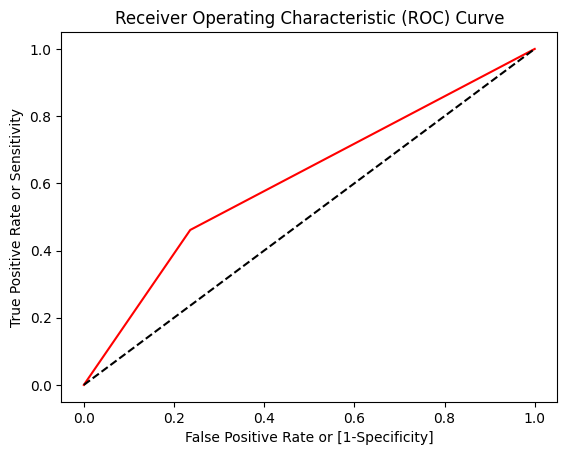

In [ ]:
from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color="red")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate or [1-Specificity]")
plt.ylabel("True Positive Rate or Sensitivity")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.show()

In [ ]:
# The curve is just above the diagonal line. This model is better than just random guessing

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

np.float64(0.6126073787179105)